Nhóm **4T**  - Kết quả cuối đạt 0.78468 trên Kaggle

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import statsmodels.api as sm
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB 
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import  LabelEncoder, StandardScaler

# Đọc dữ liệu và xem thông tin

In [2]:
df_train = pd.read_csv('train.csv')
df_test=pd.read_csv('test.csv')
df_train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [3]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 66.2+ KB


In [4]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 27.8+ KB


# Biểu diễn 1 số feature thông qua biểu đồ( Visualize data)

0    549
1    342
Name: Survived, dtype: int64


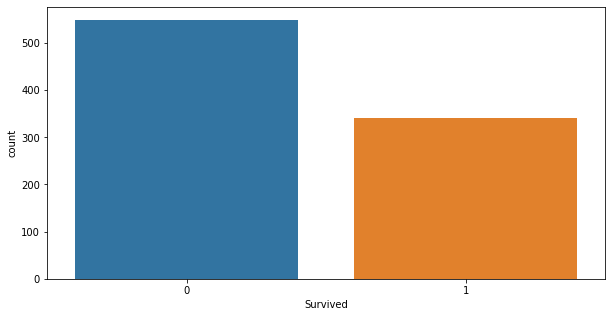

In [6]:
#Survived
fig = plt.figure(figsize=(10,5))
sns.countplot(x='Survived', data=df_train)
print(df_train.Survived.value_counts())

Ta thấy số lượng người chết cao hơn người sống sót

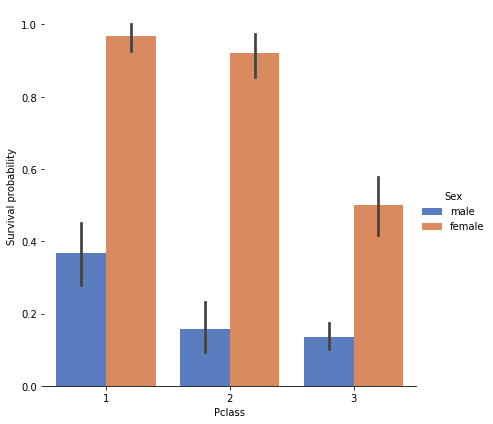

In [7]:
# Pclass + Sex
g = sns.catplot(x="Pclass", y="Survived", hue="Sex", data=df_train,
                height=6, kind="bar", palette="muted")
g.despine(left=True)
g.set_ylabels("Survival probability")

Ta thấy tỉ lệ nữ sống sót cao hơn nam và các hành khách ở Pclass 1 có tỉ lệ sống sót cao hơn các class khác

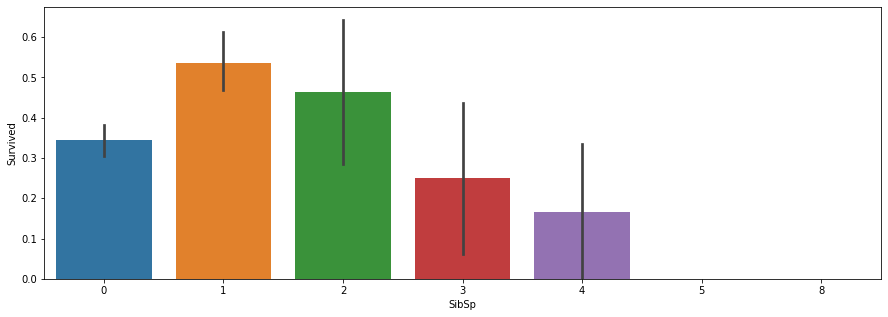

In [8]:
#SibSp 
fig = plt.figure(figsize=(15,5))
sns.barplot(x="SibSp", y="Survived", data=df_train)

Không có mối tương quan rõ ràng nhưng nhìn chung ta thấy những người có nhiều SibSp (anh/chị/em hay vợ/chồng) ít có khả năng sống sót hơn. Ngoài ra, những người có SibSp = 0 ít có khả năng sống sót hơn những người có SibSp = {1,2}.

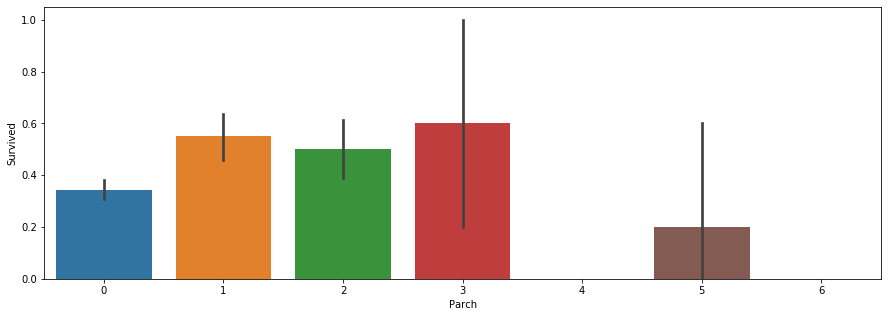

In [9]:
# Parch
fig = plt.figure(figsize=(15,5))
sns.barplot(x="Parch", y="Survived", data=df_train)

Không có mối tương quan rõ ràng nhưng ta có thể thấy những người có Parch(cha mẹ / con cái) = 0 ít có khả năng sống sót hơn những người có Parch = {1,2,3} và những người có Parch = 5 có tỉ lệ sống sót thấp nhất.

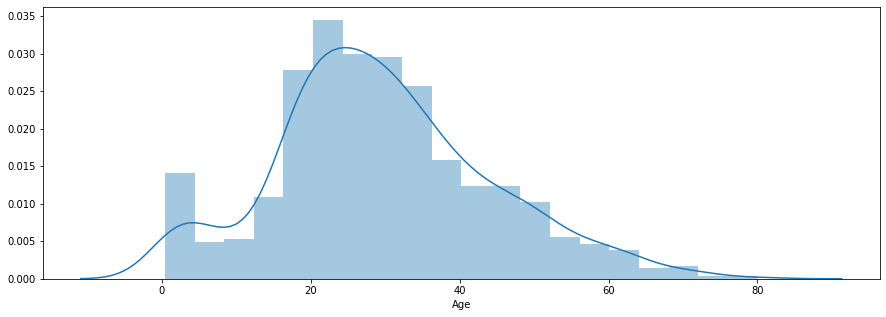

In [10]:
#Age
fig = plt.figure(figsize=(15,5))
sns.distplot(df_train["Age"])

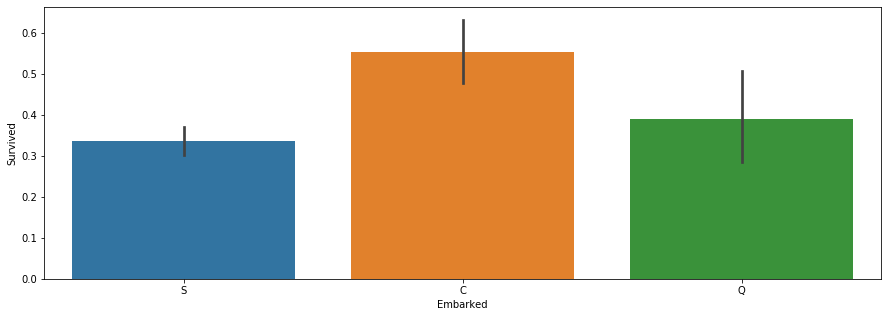

In [11]:
fig = plt.figure(figsize=(15,5))
sns.barplot(x="Embarked", y="Survived", data=df_train)

d:\program files\python\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


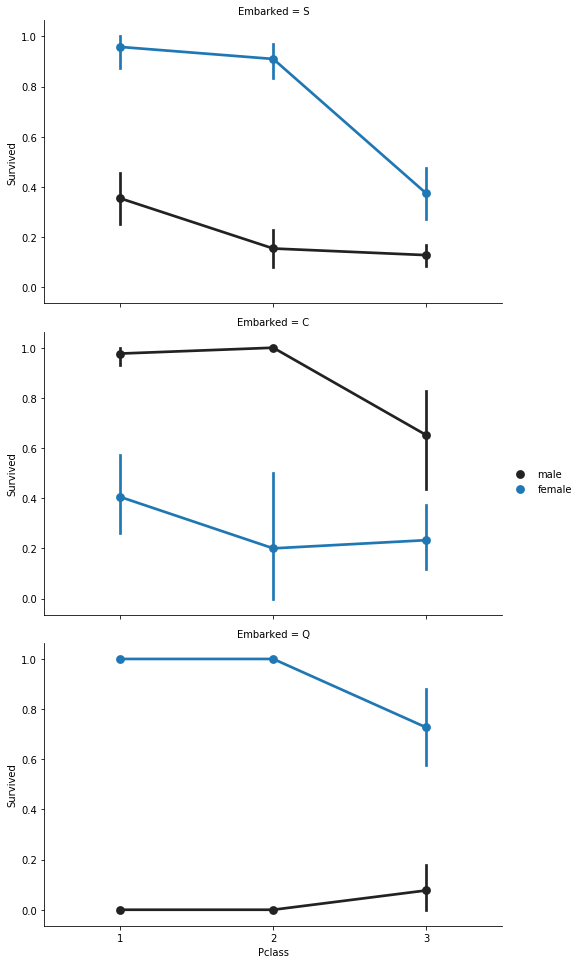

In [12]:
FacetGrid = sns.FacetGrid(df_train, row='Embarked', size=4.5, aspect=1.6)
FacetGrid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette=None,  order=None, hue_order=None )
FacetGrid.add_legend()

Embarked có sư tương quan với Survived và tùy thuộc giới tính.  Phụ nữ lên ở cảng Q và cảng S có cơ hội sống sót cao hơn.  Đàn ông có xác suất sống sót cao nếu họ ở cảng C, nhưng xác suất thấp nếu họ ở cổng Q hoặc S. 

# Tiền xử lý dữ liệu (Data preprocessing)

In [13]:
df_train.isnull().mean().sort_values(ascending=True)

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Embarked       0.002245
Age            0.198653
Cabin          0.771044
dtype: float64

Ta thấy: 
- Cột Cabin có tỉ lệ mất dữ liệu quá cao (77,1%) nên ta sẽ loại cột này ra khỏi tập train.
- Cột Age và Embarked có thể giữ lại.

(7.0, 0.0)

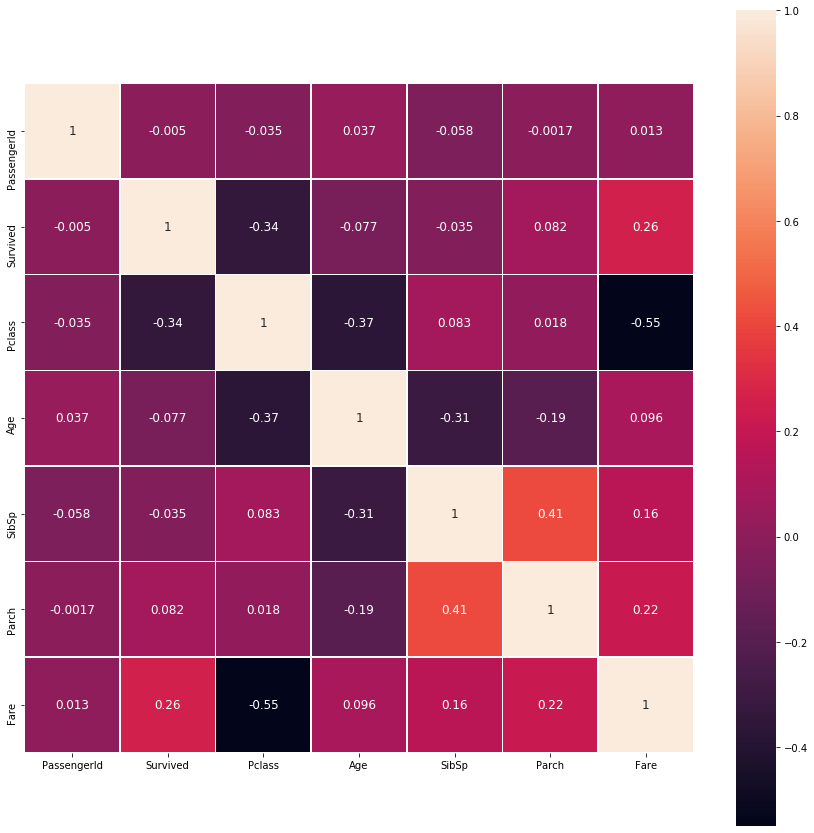

In [14]:
# Kiểm tra sự tương quan giữa các feature bằng heatmap
data=df_train.corr()
fig, axs = plt.subplots(nrows=1, figsize=(15, 15))
sns.heatmap(data, annot=True, square=True ,linewidths=0.5, annot_kws={'size':12})
bottom, top = axs.get_ylim()
axs.set_ylim(bottom + 0.5, top - 0.5)

In [15]:
df_train['Embarked'].describe()

count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object

Ta thấy 'S' là giá trị thường xuyên xuất hiện nhất trong cột Embarked nên ta sẽ chọn nó điền vào thay các giá trị Null. 
Tiếp theo ta sẽ bỏ cột Cabin vì lý do đã nêu ở phía trên

In [16]:
df_train['Embarked'] = df_train['Embarked'].fillna('S')
df_train.drop(['Cabin'], axis=1, inplace=True)
df_test.drop(['Cabin'], axis=1, inplace=True)

Tiếp theo, ta sẽ dùng giá trị median  điền vào các giá trị bị null.

In [17]:
df_train['Age']=df_train['Age'].groupby([df_train['Sex'],df_train['Pclass']]).apply(lambda x:x.fillna(x.median()))

Dựa vào biểu dồ feature Age đã biểu diễn ở trên, Ta sẽ tách feature Age thành nhiều nhóm lứa tuổi (vì feature Age thuộc dữ liệu liên tục) như dưới đây. 

In [18]:
df_train['AgeGroup'] = 0
df_train.loc[df_train['Age'] <= 11, 'AgeGroup'] = 0
df_train.loc[(df_train['Age'] > 11) & (df_train['Age'] <= 18), 'AgeGroup'] = 1
df_train.loc[(df_train['Age'] > 18) & (df_train['Age'] <= 22), 'AgeGroup'] = 2
df_train.loc[(df_train['Age'] > 22) & (df_train['Age'] <= 27), 'AgeGroup'] = 3
df_train.loc[(df_train['Age'] > 27) & (df_train['Age'] <= 35), 'AgeGroup'] = 4
df_train.loc[(df_train['Age'] > 35) & (df_train['Age'] <= 45), 'AgeGroup'] = 5
df_train.loc[(df_train['Age'] > 45) & (df_train['Age'] <= 66), 'AgeGroup'] = 6
df_train.loc[ df_train['Age'] > 66, 'AgeGroup'] = 6

In [19]:
df_test['AgeGroup'] = 0
df_test.loc[df_test['Age'] <= 11, 'AgeGroup'] = 0
df_test.loc[(df_test['Age'] > 11) & (df_test['Age'] <= 18), 'AgeGroup'] = 1
df_test.loc[(df_test['Age'] > 18) & (df_test['Age'] <= 22), 'AgeGroup'] = 2
df_test.loc[(df_test['Age'] > 22) & (df_test['Age'] <= 27), 'AgeGroup'] = 3
df_test.loc[(df_test['Age'] > 27) & (df_test['Age'] <= 35), 'AgeGroup'] = 4
df_test.loc[(df_test['Age'] > 35) & (df_test['Age'] <= 45), 'AgeGroup'] = 5
df_test.loc[(df_test['Age'] > 45) & (df_test['Age'] <= 66), 'AgeGroup'] = 6
df_test.loc[ df_test['Age'] > 66, 'AgeGroup'] = 6

In [20]:
df_train['AgeGroup'].value_counts()

3    200
4    180
5    135
2    134
6    103
1     71
0     68
Name: AgeGroup, dtype: int64

In [21]:
df_train.drop(['Age'], axis=1, inplace=True)
df_test.drop(['Age'], axis=1, inplace=True)

Ta cần chuyển các giá trị của cột Sex và Embarked từ dạng không phải dữ liệu số về dữ liệu số bằng Label Encoder

In [22]:
for col in ['Sex', 'Embarked']:
    df_train[col] = LabelEncoder().fit_transform(df_train[col])
    df_test[col] = LabelEncoder().fit_transform(df_test[col])

Tiếp theo. ta sẽ tạo cột Title lấy title của Name nhằm thay cho cột Name khó xử lý và sau đó chuyển nó về dạng numerical

In [23]:
df_train['Title'] = df_train['Name'].str.extract(' ([A-Za-z]+)\.', expand = False)
df_test['Title'] = df_test['Name'].str.extract(' ([A-Za-z]+)\.', expand = False)
df_train['Title'].unique().tolist()

['Mr',
 'Mrs',
 'Miss',
 'Master',
 'Don',
 'Rev',
 'Dr',
 'Mme',
 'Ms',
 'Major',
 'Lady',
 'Sir',
 'Mlle',
 'Col',
 'Capt',
 'Countess',
 'Jonkheer']

In [24]:
df_train['Title'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Col           2
Major         2
Don           1
Lady          1
Mme           1
Sir           1
Capt          1
Ms            1
Countess      1
Jonkheer      1
Name: Title, dtype: int64

Ta thấy có 1 số title rất phổ biến nhứng các title còn lại rất hiếm xuất hiện. Do đó, ta sẽ gộp chúng lại và tạo thành 5 title như dưới đây để chuyển chúng về numerical

In [25]:
df_test['Title'] = df_test['Title'].replace(['Lady', 'Countess','Capt', 'Col', 'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
df_test['Title'] = df_test['Title'].replace('Mlle', 'Miss')
df_test['Title'] = df_test['Title'].replace('Ms', 'Miss')
df_test['Title'] = df_test['Title'].replace('Mme', 'Mrs')
    
title = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
df_test['Title'] = df_test['Title'].map(title)

# thay các giá trị bị mất dữ liệu bằng 0
df_test['Title'] = df_test['Title'].fillna(0)

In [26]:
df_train['Title'] = df_train['Title'].replace(['Lady', 'Countess','Capt', 'Col', 'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
df_train['Title'] = df_train['Title'].replace('Mlle', 'Miss')
df_train['Title'] = df_train['Title'].replace('Ms', 'Miss')
df_train['Title'] = df_train['Title'].replace('Mme', 'Mrs')
    
title = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
df_train['Title'] = df_train['Title'].map(title)

# thay các giá trị bị mất dữ liệu bằng 0
df_train['Title'] = df_train['Title'].fillna(0)

In [27]:
df_train.drop(['Name'], axis=1, inplace=True)
df_test.drop(['Name'], axis=1, inplace=True)

In [28]:
df_train['Ticket'].describe()

count      891
unique     681
top       1601
freq         7
Name: Ticket, dtype: object

Vì thuộc tính Ticket có 681 vé duy nhất nên nó gây khó khăn khi chuyển đổi chúng thành dạng categories. Vì vậy, ta sẽ loại nó ra bộ dữ liệu.

In [29]:
df_train = df_train.drop(['Ticket'], axis=1)
df_test = df_test.drop(['Ticket'], axis=1)

In [30]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Sex            891 non-null int32
SibSp          891 non-null int64
Parch          891 non-null int64
Fare           891 non-null float64
Embarked       891 non-null int32
AgeGroup       891 non-null int64
Title          891 non-null int64
dtypes: float64(1), int32(2), int64(7)
memory usage: 62.7 KB


In [31]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 9 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Sex            418 non-null int32
SibSp          418 non-null int64
Parch          418 non-null int64
Fare           417 non-null float64
Embarked       418 non-null int32
AgeGroup       418 non-null int64
Title          418 non-null int64
dtypes: float64(1), int32(2), int64(6)
memory usage: 26.2 KB


In [32]:
df_test['Fare']=df_test['Fare'].fillna(df_test['Fare'].mean())

In [33]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 9 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Sex            418 non-null int32
SibSp          418 non-null int64
Parch          418 non-null int64
Fare           418 non-null float64
Embarked       418 non-null int32
AgeGroup       418 non-null int64
Title          418 non-null int64
dtypes: float64(1), int32(2), int64(6)
memory usage: 26.2 KB


# Đào tạo mô hình

In [34]:
Y_train= df_train['Survived']
X_train= df_train.drop(['Survived'],axis=1)
#chuẩn hóa
X_train = StandardScaler().fit_transform(X_train)
X_test=StandardScaler().fit_transform(df_test)

In [35]:
#Logistic Regression Algorithm 
LR = LogisticRegression(random_state = 0,solver='lbfgs')
LR.fit(X_train, Y_train)
  
#K Nearest Neighbor algorithm
KNN = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
KNN.fit(X_train, Y_train)

#Support Vector Machine Algorithm với nhiều kiểu kernel
SVM_Linear = SVC(kernel = 'linear', random_state = 0)
SVM_Linear.fit(X_train, Y_train)

SVM_Poly = SVC(kernel = 'poly', random_state = 0)
SVM_Poly.fit(X_train, Y_train)

SVM_Sig = SVC(kernel = 'sigmoid', random_state = 0)
SVM_Sig.fit(X_train, Y_train)

SVM_Rbf = SVC(kernel = 'rbf', random_state = 0)
SVM_Rbf.fit(X_train, Y_train)

#Gaussian Naïve Bayes Algorithm
GNB = GaussianNB()
GNB.fit(X_train, Y_train)

# Decision Tree Algorithm
DC_Tree = DecisionTreeClassifier(criterion = 'gini', splitter='random',random_state=0)
DC_Tree.fit(X_train, Y_train)

# Random Forest Classification Algorithm
Rand_Forest = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
Rand_Forest.fit(X_train, Y_train)

print('Logistic Regression Training Accuracy:', LR.score(X_train, Y_train))
print('K Nearest Neighbor Training Accuracy:', KNN.score(X_train, Y_train))
print('Support Vector Machine (Linear Kernel) Training Accuracy:', SVM_Linear.score(X_train, Y_train))
print('Support Vector Machine (Poly Kernel) Training Accuracy:', SVM_Poly.score(X_train, Y_train))
print('Support Vector Machine (Sigmoid Kernel) Training Accuracy:', SVM_Sig.score(X_train, Y_train))
print('Support Vector Machine (RBF Kernel) Training Accuracy:', SVM_Rbf.score(X_train, Y_train))
print('Gaussian Naive Bayes Training Accuracy:', GNB.score(X_train, Y_train))
print('Decision Tree Classifier Training Accuracy:', DC_Tree.score(X_train, Y_train))
print('Random Forest Classifier Training Accuracy:', Rand_Forest.score(X_train, Y_train))

Logistic Regression Training Accuracy: 0.8215488215488216
K Nearest Neighbor Training Accuracy: 0.8664421997755332
Support Vector Machine (Linear Kernel) Training Accuracy: 0.8069584736251403
Support Vector Machine (Poly Kernel) Training Accuracy: 0.8540965207631874
Support Vector Machine (Sigmoid Kernel) Training Accuracy: 0.6902356902356902
Support Vector Machine (RBF Kernel) Training Accuracy: 0.8462401795735129
Gaussian Naive Bayes Training Accuracy: 0.8013468013468014
Decision Tree Classifier Training Accuracy: 1.0
Random Forest Classifier Training Accuracy: 0.9820426487093153


Theo kết quả trên thì lựa chọn phù hợp nhất cho mô hình cuối cùng là Random Forest Classifier vì nó có độ chính xác cao nhất và không bị overfitting như Decision Tree Classifier





In [36]:
df_test.head()

,PassengerId,Pclass,Sex,SibSp,Parch,Fare,Embarked,AgeGroup,Title
0,892,3,1,0,0,7.8292,1,4,1
1,893,3,0,1,0,7.0000,2,6,3
2,894,2,1,0,0,9.6875,1,6,1
3,895,3,1,0,0,8.6625,2,3,1
4,896,3,0,1,1,12.2875,2,2,3


In [37]:
final_model= RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
final_predictions = final_model.fit(X_train,Y_train).predict(X_test)
Id=df_test['PassengerId']
output = pd.DataFrame({'PassengerId': Id, 'Survived':final_predictions})
output.to_csv('Submission3.csv', index=False , header = 1)

Kết quả cuối đạt 0.78468 trên Kaggle

Nguồn tham khảo: https://towardsdatascience.com/predicting-the-survival-of-titanic-passengers-30870ccc7e8
                 https://www.kaggle.com/prestonfan/titanic-predictions-survived-or-deceased